<a href="https://colab.research.google.com/github/FrankieBoyC/MachineLearningFinal./blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np


path = "/content/drive/MyDrive/CSV/WineQT.csv"
df = pd.read_csv(path, header = None)
df.columns = df.iloc[0]
df = df[1:]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1140,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1141,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5,1594
1142,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6,1595


In [ ]:
# Number One: Data Cleaning and Visualization
# Checking for Missing Values
df.isnull().values.any()
df.isnull().sum().sum()

# Dealing with outliers
Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['quality'] < Q1 - threshold * IQR) | (df['quality acidity'] > Q3 + threshold * IQR)]

df = df.drop(outliers.index)
print(outliers)

In [ ]:
# Number Two: Complete Two Different Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# LR model
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test).reshape(-1, 1)
print(pred)

# Decision Tree
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

[[5.4135705 ]
 [4.72690922]
 [5.25014553]
 [5.07089282]
 [6.13050711]
 [6.58067733]
 [5.39069994]
 [5.11710262]
 [5.79973543]
 [5.33002818]
 [6.35814675]
 [6.34379457]
 [5.29488107]
 [6.1880613 ]
 [5.79965705]
 [4.8340499 ]
 [5.70121118]
 [5.69812156]
 [5.43448354]
 [6.38931997]
 [6.04397463]
 [6.03055296]
 [5.16677464]
 [6.47471145]
 [5.62700491]
 [5.14656045]
 [6.550752  ]
 [5.98465711]
 [5.11752494]
 [5.53084632]
 [6.18037013]
 [5.5106868 ]
 [6.62763107]
 [5.73216352]
 [5.58633445]
 [5.25388828]
 [5.52402851]
 [6.02862551]
 [6.89812803]
 [6.53968707]
 [6.43719083]
 [5.37754334]
 [7.07318001]
 [5.31513243]
 [5.02077169]
 [5.10274352]
 [5.65335502]
 [5.89604439]
 [4.57348067]
 [5.63569138]
 [6.41904096]
 [5.2896001 ]
 [5.65739214]
 [5.89905108]
 [5.75528502]
 [6.41973558]
 [5.49853368]
 [5.65629585]
 [6.05619216]
 [5.23219547]
 [5.54885575]
 [5.93470645]
 [5.66947819]
 [6.30585215]
 [6.1332792 ]
 [5.42019895]
 [6.87904625]
 [5.21049522]
 [4.85751191]
 [5.95775403]
 [5.76027393]
 [5.36

DecisionTreeRegressor()

In [ ]:
# Number Three: Deal with Outliers and Missing Values
# Did this with data cleaning

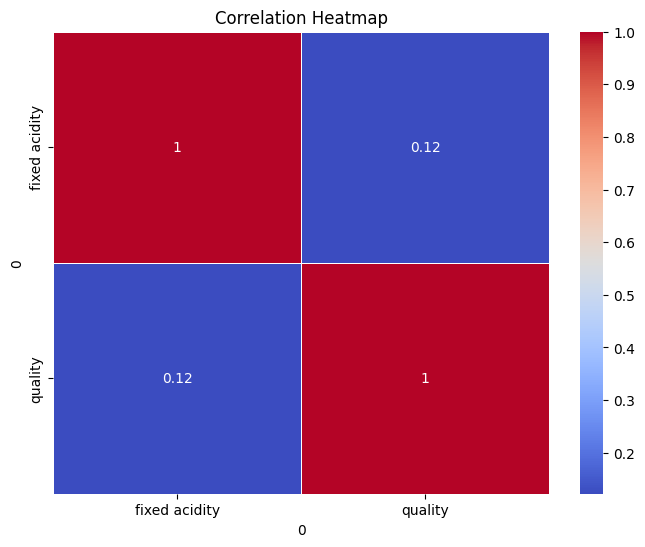

In [ ]:
# Number Four: Use correlation to find best features to use in my model
import seaborn as sns
df_acidity= df[['fixed acidity', 'quality']]
correlation_matrix = df_acidity.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

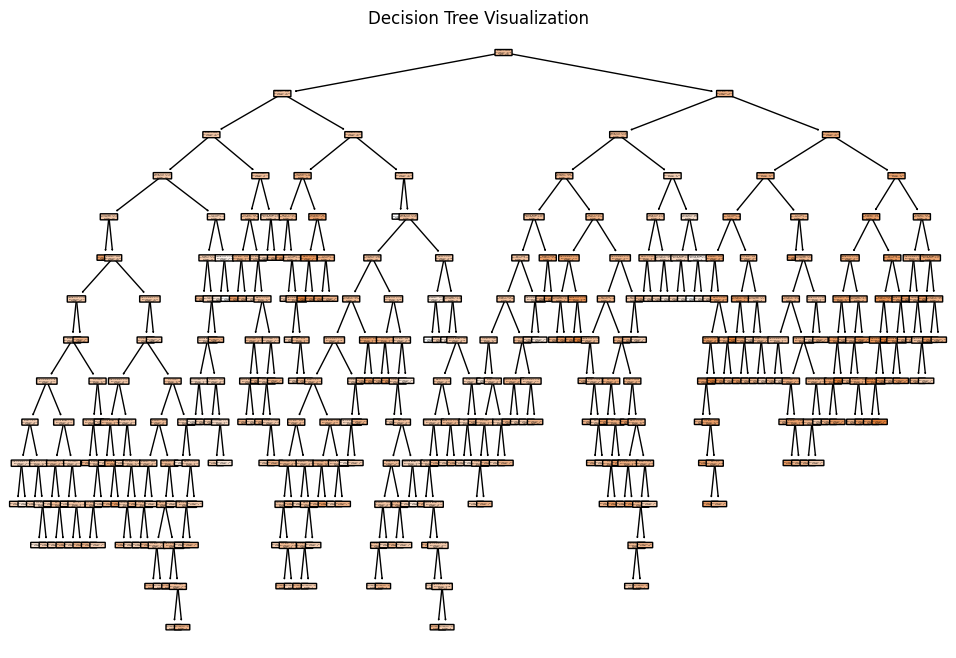

In [ ]:
# Number Five: Create a visual representation of the model
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
# Number Six: Evaluate one of my models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)

predicted_quality = model.predict(X)

# Model Evaluation
r_squared = r2_score(y, predicted_quality)
mse = mean_squared_error(y, predicted_quality)

# Print model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"\nIntercept: {intercept:.2f}")
print(f"R-squared (R^2): {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Coefficients:
fixed acidity: 0.02
volatile acidity: -1.13
citric acid: -0.12
residual sugar: 0.01
chlorides: -1.72
free sulfur dioxide: 0.00
total sulfur dioxide: -0.00
density: -18.80
pH: -0.43
sulphates: 0.86
alcohol: 0.28
Id: -0.00

Intercept: 23.03
R-squared (R^2): 0.37
Mean Squared Error (MSE): 0.41
